<a href="https://colab.research.google.com/github/gkondayya/ACP2021/blob/main/rsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [11]:
import pandas as pd
import yfinance as yf
import numpy as np


In [9]:
stocks = ["RELIANCE.NS","IRCTC.NS", "HDFCBANK.NS","INFY.NS","AMBER.NS", "BAJFINANCE.NS"]
ohlcv_data = {}
for ticker in stocks:
  temp = yf.download(ticker,period='1mo', interval = '15m')
  temp.dropna(how='any',inplace=True)
  ohlcv_data[ticker]=temp

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
def RSI(DF, n=14):
    "function to calculate RSI"
    df = DF.copy()
    df["change"] = df["Adj Close"] - df["Adj Close"].shift(1)
    df["gain"] = np.where(df["change"]>=0, df["change"], 0)
    df["loss"] = np.where(df["change"]<0, -1*df["change"], 0)
    df["avgGain"] = df["gain"].ewm(alpha=1/n, min_periods=n).mean()
    df["avgLoss"] = df["loss"].ewm(alpha=1/n, min_periods=n).mean()
    df["rs"] = df["avgGain"]/df["avgLoss"]
    df["rsi"] = 100 - (100/ (1 + df["rs"]))
    return df["rsi"]


for ticker in ohlcv_data:
    ohlcv_data[ticker]["RSI"] = RSI(ohlcv_data[ticker])
    

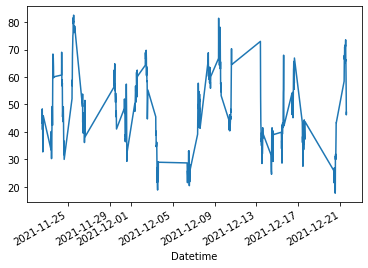

In [13]:
ohlcv_data["RELIANCE.NS"]["RSI"].plot() 